In [161]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [162]:
df = pd.read_csv("HomeC_work.csv")
df

,real,predict,month,day,weekday,hour,minute
0,0.013283,-0.013313,11,1,Tuesday,0,1
1,0.068133,0.025262,11,1,Tuesday,0,2
2,0.118167,0.072004,11,1,Tuesday,0,3
3,0.699050,0.704830,11,1,Tuesday,0,4
4,0.666250,0.671340,11,1,Tuesday,0,5
...,...,...,...,...,...,...,...
43194,0.947467,0.952020,11,30,Wednesday,23,55
43195,0.949917,0.954362,11,30,Wednesday,23,56
43196,0.925950,0.931391,11,30,Wednesday,23,57
43197,0.918600,0.924323,11,30,Wednesday,23,58


In [163]:
df = df.loc[df['day']==1]
df

,real,predict,month,day,weekday,hour,minute
0,0.013283,-0.013313,11,1,Tuesday,0,1
1,0.068133,0.025262,11,1,Tuesday,0,2
2,0.118167,0.072004,11,1,Tuesday,0,3
3,0.699050,0.704830,11,1,Tuesday,0,4
4,0.666250,0.671340,11,1,Tuesday,0,5
...,...,...,...,...,...,...,...
1434,0.433717,0.432073,11,1,Tuesday,23,55
1435,0.410500,0.406642,11,1,Tuesday,23,56
1436,0.181200,0.147966,11,1,Tuesday,23,57
1437,0.009483,0.000743,11,1,Tuesday,23,58


In [164]:
df['time'] = pd.DatetimeIndex(pd.date_range('2016-11-01 00:01', periods=len(df),  freq='min'))
interested = ['predict','time']

/tmp/ipykernel_169/4115142308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.DatetimeIndex(pd.date_range('2016-11-01 00:01', periods=len(df),  freq='min'))


In [165]:
df = df[interested]
df

,predict,time
0,-0.013313,2016-11-01 00:01:00
1,0.025262,2016-11-01 00:02:00
2,0.072004,2016-11-01 00:03:00
3,0.704830,2016-11-01 00:04:00
4,0.671340,2016-11-01 00:05:00
...,...,...
1434,0.432073,2016-11-01 23:55:00
1435,0.406642,2016-11-01 23:56:00
1436,0.147966,2016-11-01 23:57:00
1437,0.000743,2016-11-01 23:58:00


In [166]:
df['time'] = df['time'].astype(str)

/tmp/ipykernel_169/2656587255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['time'].astype(str)


In [167]:
df2 = pd.read_csv("final.csv")
df2.rename(columns={'0':'transfer'}, inplace=True)
interested= ['time','transfer']

In [168]:
df2 = df2[interested]

In [169]:
df2['time'] = pd.to_datetime(df2['time'])

In [170]:
df2['time'] = pd.DatetimeIndex(df2['time']) + timedelta(hours=6)
df2['time']

0     2016-11-01 13:00:00
1     2016-11-01 13:01:00
2     2016-11-01 13:02:00
3     2016-11-01 13:03:00
4     2016-11-01 13:04:00
              ...        
355   2016-11-01 18:55:00
356   2016-11-01 18:56:00
357   2016-11-01 18:57:00
358   2016-11-01 18:58:00
359   2016-11-01 18:59:00
Name: time, Length: 360, dtype: datetime64[ns]

In [190]:
df2

,time,transfer
0,2016-11-01 13:00:00,0.438110
1,2016-11-01 13:01:00,0.442749
2,2016-11-01 13:02:00,0.442012
3,2016-11-01 13:03:00,0.441498
4,2016-11-01 13:04:00,0.439553
...,...,...
355,2016-11-01 18:55:00,0.000000
356,2016-11-01 18:56:00,0.000000
357,2016-11-01 18:57:00,0.000000
358,2016-11-01 18:58:00,0.000000


In [191]:
df2['time'] = df2['time'].astype(str)
df2['time']

0      2016-11-01 13:00:00
1      2016-11-01 13:01:00
2      2016-11-01 13:02:00
3      2016-11-01 13:03:00
4      2016-11-01 13:04:00
              ...         
355    2016-11-01 18:55:00
356    2016-11-01 18:56:00
357    2016-11-01 18:57:00
358    2016-11-01 18:58:00
359    2016-11-01 18:59:00
Name: time, Length: 360, dtype: object

In [196]:
df2

,time,transfer
0,2016-11-01 13:00:00,0.438110
1,2016-11-01 13:01:00,0.442749
2,2016-11-01 13:02:00,0.442012
3,2016-11-01 13:03:00,0.441498
4,2016-11-01 13:04:00,0.439553
...,...,...
355,2016-11-01 18:55:00,0.000000
356,2016-11-01 18:56:00,0.000000
357,2016-11-01 18:57:00,0.000000
358,2016-11-01 18:58:00,0.000000


In [194]:
total1 = pd.merge(df,df2, how='outer', on='time')
total1 = total1.fillna(0)

In [195]:
total1

,predict,time,transfer
0,-0.013313,2016-11-01 00:01:00,0.0
1,0.025262,2016-11-01 00:02:00,0.0
2,0.072004,2016-11-01 00:03:00,0.0
3,0.704830,2016-11-01 00:04:00,0.0
4,0.671340,2016-11-01 00:05:00,0.0
...,...,...,...
1434,0.432073,2016-11-01 23:55:00,0.0
1435,0.406642,2016-11-01 23:56:00,0.0
1436,0.147966,2016-11-01 23:57:00,0.0
1437,0.000743,2016-11-01 23:58:00,0.0


In [197]:
total1['final'] = total1['predict'] + total1['transfer']
total1

,predict,time,transfer,final
0,-0.013313,2016-11-01 00:01:00,0.0,-0.013313
1,0.025262,2016-11-01 00:02:00,0.0,0.025262
2,0.072004,2016-11-01 00:03:00,0.0,0.072004
3,0.704830,2016-11-01 00:04:00,0.0,0.704830
4,0.671340,2016-11-01 00:05:00,0.0,0.671340
...,...,...,...,...
1434,0.432073,2016-11-01 23:55:00,0.0,0.432073
1435,0.406642,2016-11-01 23:56:00,0.0,0.406642
1436,0.147966,2016-11-01 23:57:00,0.0,0.147966
1437,0.000743,2016-11-01 23:58:00,0.0,0.000743


In [200]:
df3 = pd.read_csv("final.csv")
df3.rename(columns={'0':'transfer1'}, inplace=True)
interested= ['time','transfer1']

In [201]:
df3 = df3[interested]
df3['time']

0      2016-11-01 07:00:00
1      2016-11-01 07:01:00
2      2016-11-01 07:02:00
3      2016-11-01 07:03:00
4      2016-11-01 07:04:00
              ...         
355    2016-11-01 12:55:00
356    2016-11-01 12:56:00
357    2016-11-01 12:57:00
358    2016-11-01 12:58:00
359    2016-11-01 12:59:00
Name: time, Length: 360, dtype: object

In [202]:
df3

,time,transfer1
0,2016-11-01 07:00:00,0.438110
1,2016-11-01 07:01:00,0.442749
2,2016-11-01 07:02:00,0.442012
3,2016-11-01 07:03:00,0.441498
4,2016-11-01 07:04:00,0.439553
...,...,...
355,2016-11-01 12:55:00,0.000000
356,2016-11-01 12:56:00,0.000000
357,2016-11-01 12:57:00,0.000000
358,2016-11-01 12:58:00,0.000000


In [205]:
total2 = pd.merge(total1,df3, how='outer', on='time')
total2 = total2.fillna(0)
total2

,predict,time,transfer,final,transfer1
0,-0.013313,2016-11-01 00:01:00,0.0,-0.013313,0.0
1,0.025262,2016-11-01 00:02:00,0.0,0.025262,0.0
2,0.072004,2016-11-01 00:03:00,0.0,0.072004,0.0
3,0.704830,2016-11-01 00:04:00,0.0,0.704830,0.0
4,0.671340,2016-11-01 00:05:00,0.0,0.671340,0.0
...,...,...,...,...,...
1434,0.432073,2016-11-01 23:55:00,0.0,0.432073,0.0
1435,0.406642,2016-11-01 23:56:00,0.0,0.406642,0.0
1436,0.147966,2016-11-01 23:57:00,0.0,0.147966,0.0
1437,0.000743,2016-11-01 23:58:00,0.0,0.000743,0.0


In [206]:
total2['ffinal'] = total2['final'] - total2['transfer1']

In [211]:
total2['time'] =  pd.to_datetime(total2['time'])
total2 = total2.set_index('time')

Text(0, 0.5, 'usage(kw)')

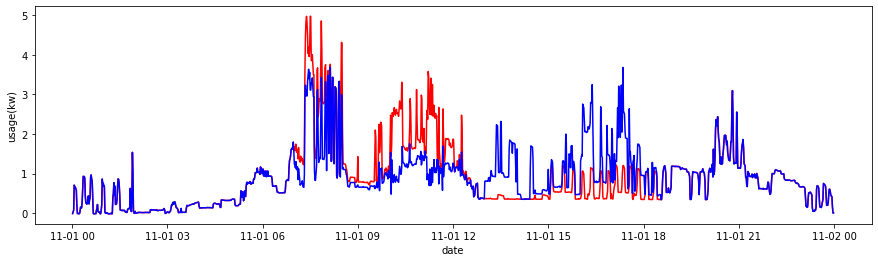

In [214]:
plt.figure(figsize=(15,4))
plt.plot(total2['predict'], c='red')

plt.plot(total2['ffinal'], c='blue')
plt.xlabel("date")
plt.ylabel("usage(kw)")